<a href="https://colab.research.google.com/github/pisaybharath/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis(Bharath)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [6]:
#importing Librabries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#importing Dataset from github url

url = "https://raw.githubusercontent.com/pisaybharath/Hotel-Booking-Analysis/main/Hotel%20Bookings.csv"
df =pd.read_csv(url)

In [8]:
#Reading head of Dataframe

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#checking Shape of Dataframe

df.shape

(119390, 32)

In [10]:
#checking columns of dataframe
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
#checking informatiom of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
#checking for null values
df.isna().sum().sort_values(ascending=False)



company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

 **STEP 1. Data Cleaning**



In [13]:
#Replacing NUll value with zero for convinience

df.fillna(0, inplace=True)

In [14]:
#again checking for null value
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Now we can see there is no null value in hotel Dataframe**

In [15]:
#checking value of children
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [16]:
#checking value of adults
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [17]:
#checking value of adults
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

# **From the above data we can say that adults, childrens and babies can't be zero at a time**

In [18]:
# so now we are going to filter data where value of adults, children and babies = 0

checking_value_0_of_ad_ch_baby = (df['adults']==0) & (df['children']==0) & (df['babies']==0)

# reading data frame where adult,children and babies are 0
df[checking_value_0_of_ad_ch_baby]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


 **As we know  adult, children and babies can't be zero at a time that means these are wrong input so we have to remove this data** 

In [19]:
#reading and storing data where adults,children and babies are having non 0 value 

hotel_df=df[~checking_value_0_of_ad_ch_baby]

In [20]:
# reading hotel_df dataframe
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


**STEP 2 : Data Analysis**


 **what is the count of each type of Hotels ?**
                             

In [21]:
hotel_list = hotel_df['hotel'].value_counts()
hotel_count = hotel_df['hotel'].value_counts().index

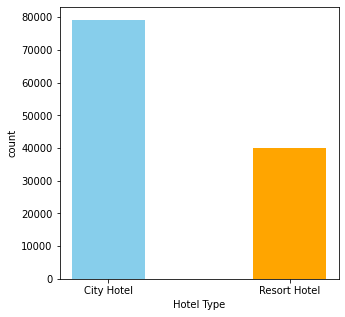

In [22]:
#setting size of graph  
plt.figure(figsize = (5, 5))
# creating the bar graph
plt.bar(hotel_count, hotel_list, color =['skyblue','orange'],width = 0.4)
plt.xlabel("Hotel Type")
plt.ylabel("count")
#showing graph
plt.show()


*From above graph we can say that there are 2 types of Hotel* 

*1. city Hotel and  2. Resort Hotel having count 79000 and 40000 approx respectively*




**where do guest come from ?**

In [23]:
#taking Top 10 country to analyze the largest number quest comes from

top_10_countries = hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
Name: country, dtype: int64

In [24]:
#renaming the index

top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})

#adding percentage column
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100


In [25]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,20977,33.993421
1,GBR,9668,15.667083
2,FRA,8468,13.722472
3,ESP,6383,10.343710
4,DEU,6067,9.831629
5,IRL,2542,4.119334
6,ITA,2428,3.934596
7,BEL,1868,3.027111
8,NLD,1716,2.780794
9,USA,1592,2.579851


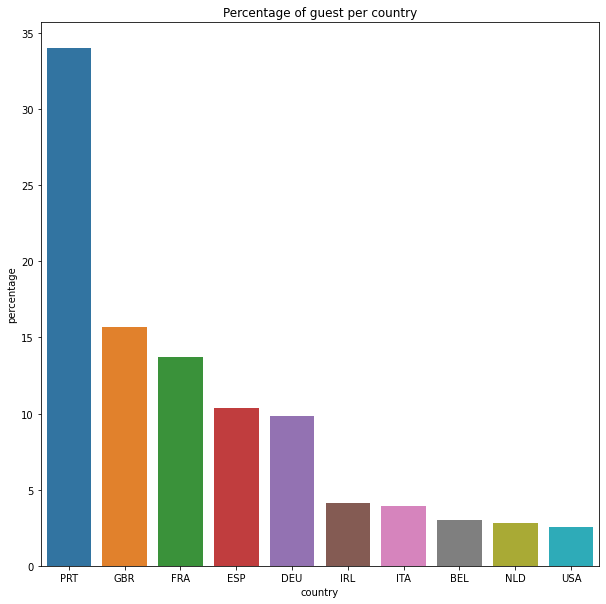

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x="country", y="percentage", data=top_10_countries).set(title='Percentage of guest per country')
plt.show()


**From the above graph we can conclude that most of guest come from  country PRT i.e Portugal**



**How much does guest pay for a room per night ?**
                                          

In [27]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
#creating new df so we can do our anlaysis non canceled room only

room_type = hotel_df[hotel_df['is_canceled']==0]

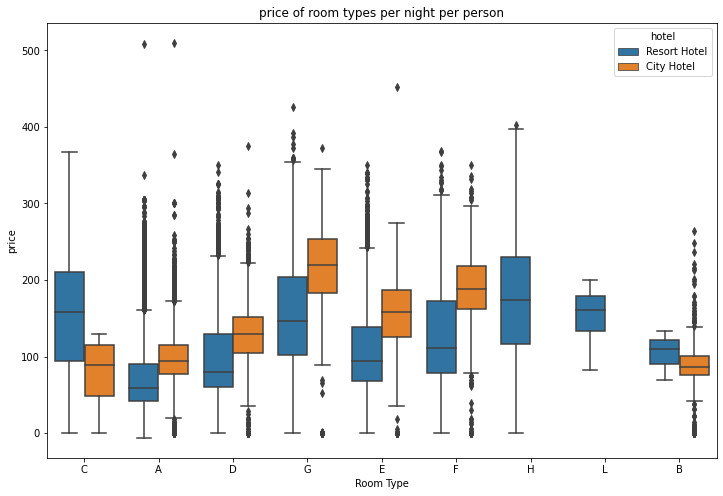

In [29]:
#ploting box plot fro analysis

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y ='adr',data = room_type,hue='hotel')
plt.title('price of room types per night per person')
plt.xlabel('Room Type')
plt.ylabel('price')
plt.show()


**We can see in the above figure that with repect to "A" category room it has highest price apppx as outlier**

**whereas with respect to  'G' category room of city hotel are much costlier than other**


**Which are most busy month ?**
              


Text(0.5, 1.0, 'Graph showing number of arrival per month')

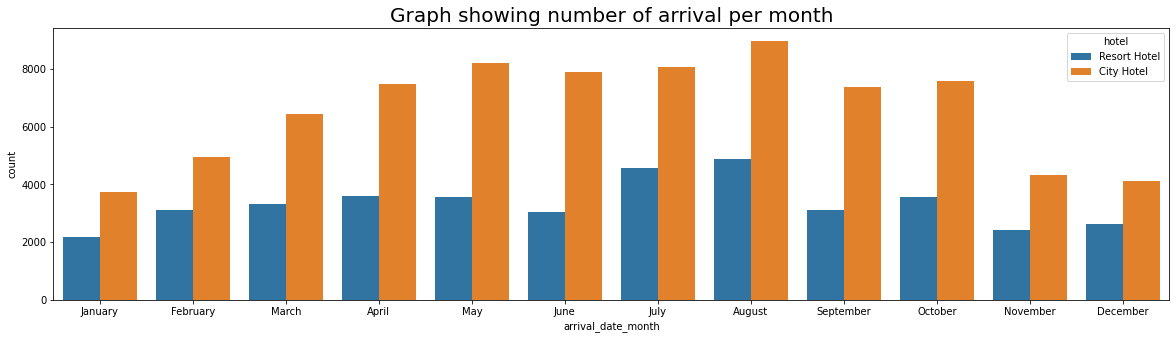

In [30]:
plt.figure(figsize=(20,5))

sns.countplot(data = hotel_df, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)



**According to the above graph the most busy month is August**


Which hotel type has highest number of cancellation?

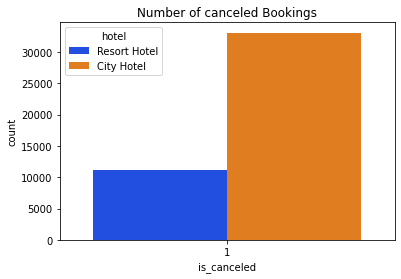

In [31]:
canceled_room=hotel_df[hotel_df['is_canceled']==1]

sns.countplot(data=canceled_room,x='is_canceled', hue='hotel', palette='bright').set_title('Number of canceled Bookings')
plt.show()



**From above vizual we can see that city hotel has more number of cancellation compared to Resort hotel**


**Booking and cancelation per market segment?**

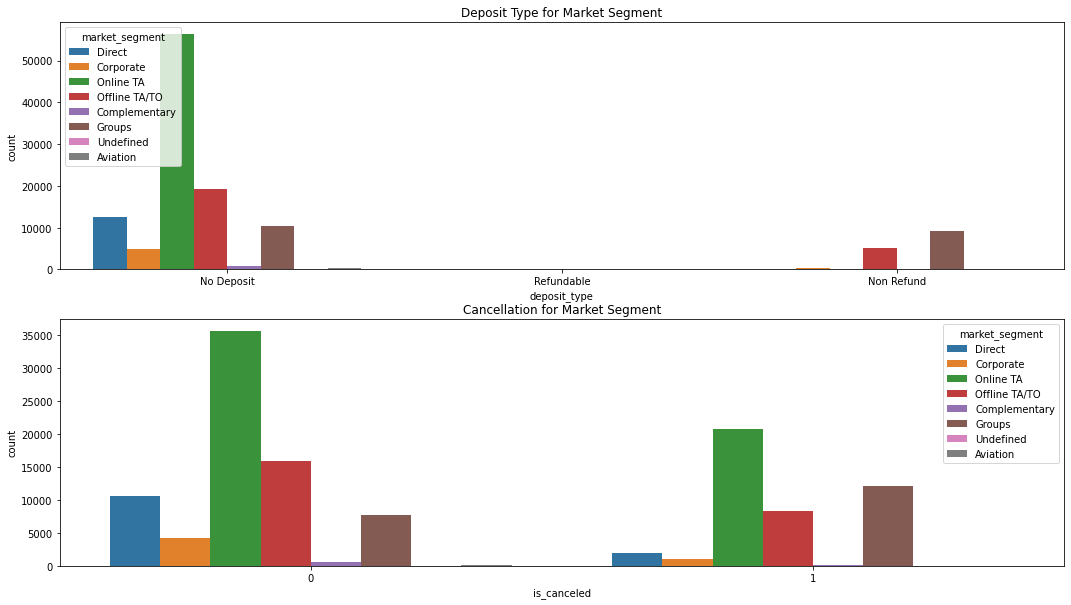

In [32]:
plt.figure(figsize=(18,10))
plt.subplot(211)
sns.countplot(data=hotel_df,x='deposit_type',hue='market_segment')
plt.title('Deposit Type for Market Segment')

plt.subplot(212)
sns.countplot(data=hotel_df,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()



**we can see from above graph 1 that most the bookings are done through Online TA segment.**

**and from above graph 2 that most cancelation is also done throuugh online TA segment only**.




**Which meals were more preferreable?**

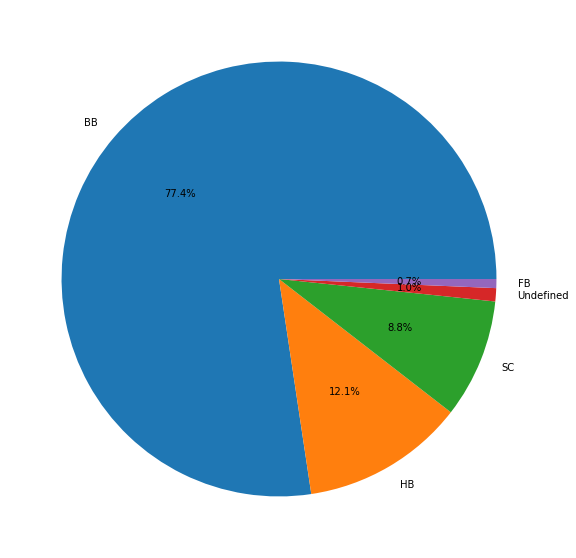

In [33]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 10,10

#Making list of  not cancelled

# assigning labels and converting them to list 

labels = hotel_df['meal'].value_counts().index

# assigning sizes and converting to list

sizes = hotel_df['meal'].value_counts().tolist()



# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place
plt.pie(sizes,labels=labels,autopct='%0.1f%%')
plt.show()


**We can see from above pie chart that most preferrable meal is BB(77.4% appx) i.e Bed and Breakfast**  


**How long does guest stay at hotel on weekends and weekdays?**

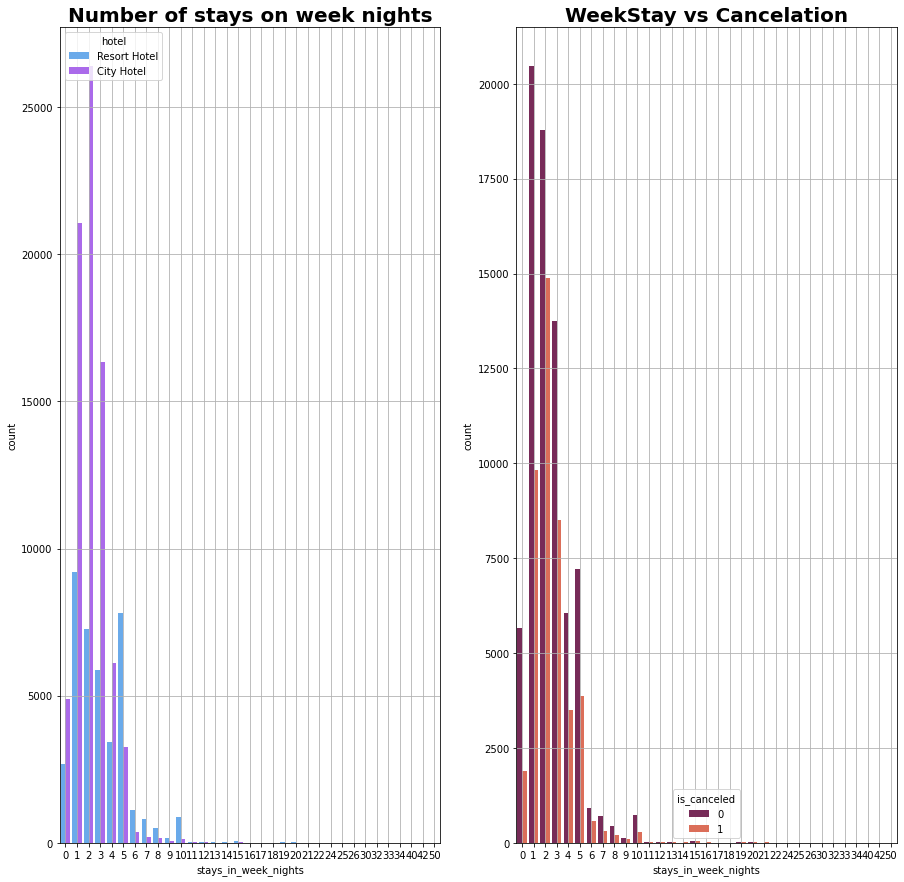

In [34]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
sns.countplot(data = hotel_df, x = 'stays_in_week_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=20)
plt.grid()
plt.subplot(1, 2, 2)
sns.countplot(data = hotel_df, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekStay vs Cancelation',fontweight="bold", size=20)
plt.grid()

plt.show()


**we can see from graph that most people are staying at hotel for 2 nights in week days**

**And second graph is showing that most cancellation is done for room which is booked for 2 night stay and we also see that most booking were not cancelled for 1 night stay**

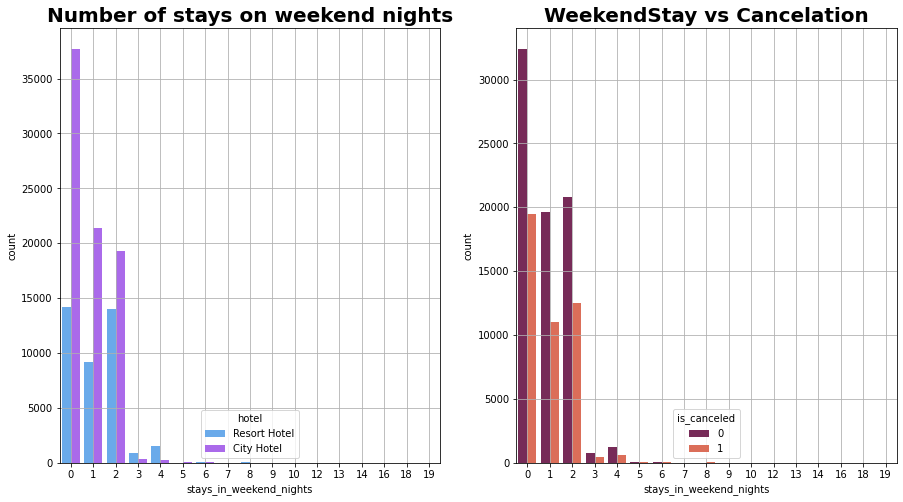

In [35]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(data = hotel_df, x = 'stays_in_weekend_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.grid()
plt.subplot(1, 2, 2)
sns.countplot(data = hotel_df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.grid()

plt.show()

#conclusion
**More number People prefer to stay at city hotel in weekend for 0,1 and 2 nights**

**People staying for more than 2 night prefer to stay in Resort hotel**

***SECOND GRAPH***

**We can see that we have less number of cancellation of booking for weekends**



 How many number of Repeated guest are there ?
 

In [36]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

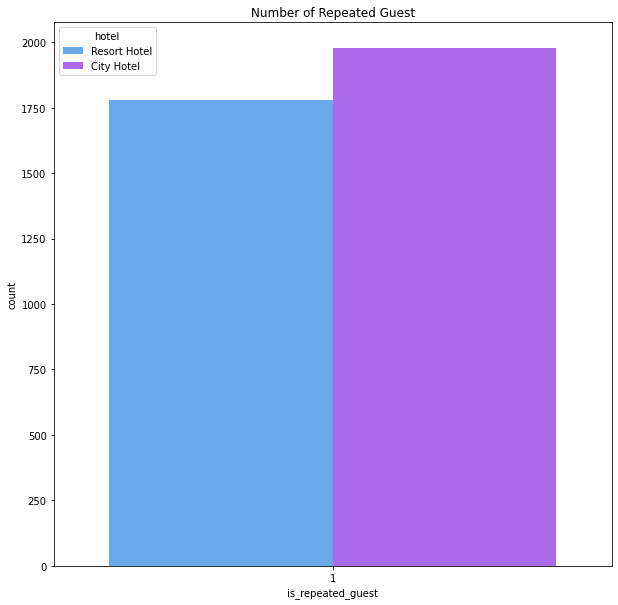

In [37]:
#creating new data frame for repeated guest 

repeated_guest_df=hotel_df[hotel_df['is_repeated_guest']==1]
sns.countplot(data=repeated_guest_df,x='is_repeated_guest', hue='hotel', palette='cool').set_title('Number of Repeated Guest')
plt.show()


 **There are very few repeated guest out which city hotel have more number of repeated guest compared to Resort hotel** 


In [38]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,151.20,0,2,Check-Out,2017-09-07
